In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st

# Importing Google maps API key
# from api_keys import g_key

mel_subs_path = "Data files/House_4thQuarter2020.csv"
mel_subs_df = pd.read_csv(mel_subs_path)

In [45]:
mel_subs_df

,Median Houses Prices 4th Quarter 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Change %,Change %.1
0,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20,No of sales,No of Sales,Oct - Dec 19,Jul - Sep 20
1,NaN,NaN,NaN,NaN,NaN,NaN,Oct - Dec 20,YTD,Oct - Dec 20,Oct - Dec 20
2,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000,20,53,6.5,-2.4
3,ABERFELDIE,1650000,1732500,1375000,1800000,1780000,9,35,7.9,-1.1
4,AINTREE,620100,675000,705000,730000,687800,52,116,10.9,-5.8
...,...,...,...,...,...,...,...,...,...,...
765,YARRAVILLE,986000,952500,1050000,970100,1082500,76,183,9.8,11.6
766,YARRAWONGA,389800,398000,452500,482500,457500,54,161,17.4,-5.2
767,YEA,420000,395000,420000,495000,496900,8,30,18.3,0.4
768,YINNAR,223000,295000,374000,365000,270000,5,14,21.1,-26.0


In [46]:
# Start by making the columns = the 2nd row in the dataset i.e. row index 0.
# This results in two rows of "headings"
mel_subs_df.columns = mel_subs_df.iloc[0]
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20,No of sales,No of Sales,Oct - Dec 19,Jul - Sep 20
0,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20,No of sales,No of Sales,Oct - Dec 19,Jul - Sep 20
1,NaN,NaN,NaN,NaN,NaN,NaN,Oct - Dec 20,YTD,Oct - Dec 20,Oct - Dec 20
2,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000,20,53,6.5,-2.4
3,ABERFELDIE,1650000,1732500,1375000,1800000,1780000,9,35,7.9,-1.1
4,AINTREE,620100,675000,705000,730000,687800,52,116,10.9,-5.8
...,...,...,...,...,...,...,...,...,...,...
765,YARRAVILLE,986000,952500,1050000,970100,1082500,76,183,9.8,11.6
766,YARRAWONGA,389800,398000,452500,482500,457500,54,161,17.4,-5.2
767,YEA,420000,395000,420000,495000,496900,8,30,18.3,0.4
768,YINNAR,223000,295000,374000,365000,270000,5,14,21.1,-26.0


In [47]:
# Next want to drop the 2nd row because we don't want it anymore.
mel_subs_df = mel_subs_df.drop(mel_subs_df.index[[0,1]])
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20,No of sales,No of Sales,Oct - Dec 19,Jul - Sep 20
2,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000,20,53,6.5,-2.4
3,ABERFELDIE,1650000,1732500,1375000,1800000,1780000,9,35,7.9,-1.1
4,AINTREE,620100,675000,705000,730000,687800,52,116,10.9,-5.8
5,AIREYS INLET,1400000,1050000,1130000,1300000,1365000,6,26,-2.5,5.0
6,AIRPORT WEST,851000,832500,798500,785000,820000,31,101,-3.6,4.5
...,...,...,...,...,...,...,...,...,...,...
765,YARRAVILLE,986000,952500,1050000,970100,1082500,76,183,9.8,11.6
766,YARRAWONGA,389800,398000,452500,482500,457500,54,161,17.4,-5.2
767,YEA,420000,395000,420000,495000,496900,8,30,18.3,0.4
768,YINNAR,223000,295000,374000,365000,270000,5,14,21.1,-26.0


In [48]:
mel_subs_df = mel_subs_df.iloc[:, 0:6]
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20
2,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000
3,ABERFELDIE,1650000,1732500,1375000,1800000,1780000
4,AINTREE,620100,675000,705000,730000,687800
5,AIREYS INLET,1400000,1050000,1130000,1300000,1365000
6,AIRPORT WEST,851000,832500,798500,785000,820000
...,...,...,...,...,...,...
765,YARRAVILLE,986000,952500,1050000,970100,1082500
766,YARRAWONGA,389800,398000,452500,482500,457500
767,YEA,420000,395000,420000,495000,496900
768,YINNAR,223000,295000,374000,365000,270000


In [51]:
mel_subs_df = mel_subs_df.reset_index(drop=True)
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20
0,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000
1,ABERFELDIE,1650000,1732500,1375000,1800000,1780000
2,AINTREE,620100,675000,705000,730000,687800
3,AIREYS INLET,1400000,1050000,1130000,1300000,1365000
4,AIRPORT WEST,851000,832500,798500,785000,820000
...,...,...,...,...,...,...
763,YARRAVILLE,986000,952500,1050000,970100,1082500
764,YARRAWONGA,389800,398000,452500,482500,457500
765,YEA,420000,395000,420000,495000,496900
766,YINNAR,223000,295000,374000,365000,270000


In [52]:
mel_subs_df.count()

0
SUBURB          768
Oct - Dec 19    767
Jan - Mar 20    767
Apr- Jun 20     767
Jul - Sep 20    767
Oct - Dec 20    767
dtype: int64

In [53]:
mel_subs_df = mel_subs_df.drop(mel_subs_df.index[[767]])
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,Oct - Dec 20
0,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000
1,ABERFELDIE,1650000,1732500,1375000,1800000,1780000
2,AINTREE,620100,675000,705000,730000,687800
3,AIREYS INLET,1400000,1050000,1130000,1300000,1365000
4,AIRPORT WEST,851000,832500,798500,785000,820000
...,...,...,...,...,...,...
762,YARRAM,249800,259000,247500,241000,300000
763,YARRAVILLE,986000,952500,1050000,970100,1082500
764,YARRAWONGA,389800,398000,452500,482500,457500
765,YEA,420000,395000,420000,495000,496900


In [54]:
mel_subs_df = mel_subs_df.rename(columns={"Apr- Jun 20": "Apr - Jun 20"})
mel_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20,Oct - Dec 20
0,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000
1,ABERFELDIE,1650000,1732500,1375000,1800000,1780000
2,AINTREE,620100,675000,705000,730000,687800
3,AIREYS INLET,1400000,1050000,1130000,1300000,1365000
4,AIRPORT WEST,851000,832500,798500,785000,820000
...,...,...,...,...,...,...
762,YARRAM,249800,259000,247500,241000,300000
763,YARRAVILLE,986000,952500,1050000,970100,1082500
764,YARRAWONGA,389800,398000,452500,482500,457500
765,YEA,420000,395000,420000,495000,496900


In [61]:
for i in mel_subs_df.columns:
    mel_subs_df[i].astype('str').apply(lambda x: print(mel_subs_df[i].name) if x.startswith('-') else 'pass')

Oct - Dec 19
Oct - Dec 19
Jan - Mar 20


In [66]:
missing_data = mel_subs_df.loc[(mel_subs_df["Oct - Dec 19"] == "-") | (mel_subs_df["Jan - Mar 20"] == "-")]
missing_data

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20,Oct - Dec 20
201,DEANSIDE,-,4300000,363300,473500,359000
567,RED HILL,-,-,860000,765000,1010000


In [67]:
clean_subs_df = mel_subs_df.drop(missing_data.index)
clean_subs_df

,SUBURB,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20,Oct - Dec 20
0,ABBOTSFORD,1155000,1230000,1080000,1260000,1230000
1,ABERFELDIE,1650000,1732500,1375000,1800000,1780000
2,AINTREE,620100,675000,705000,730000,687800
3,AIREYS INLET,1400000,1050000,1130000,1300000,1365000
4,AIRPORT WEST,851000,832500,798500,785000,820000
...,...,...,...,...,...,...
762,YARRAM,249800,259000,247500,241000,300000
763,YARRAVILLE,986000,952500,1050000,970100,1082500
764,YARRAWONGA,389800,398000,452500,482500,457500
765,YEA,420000,395000,420000,495000,496900


In [68]:
suburb_count = clean_subs_df["SUBURB"].nunique()
oct_dec_avg_19 = clean_subs_df.iloc[:,1].astype(float).mean()
jan_mar_avg = clean_subs_df.iloc[:,2].astype(float).mean()
apr_jun_avg = clean_subs_df.iloc[:,3].astype(float).mean()
jul_sep_avg = clean_subs_df.iloc[:,4].astype(float).mean()
oct_dec_avg_20 = clean_subs_df.iloc[:,5].astype(float).mean()

sub_stats_df = pd.DataFrame({"Suburb count": suburb_count,"Oct - Dec 19": oct_dec_avg_19,
                             "Jan - Mar 20": jan_mar_avg, "Apr - Jun 20": apr_jun_avg, 
                             "Jul - Sep 20": jul_sep_avg, "Oct - Dec 20": oct_dec_avg_20}, index=[0])

# sub_stats_df["Jul - Sep 19 Average"] = sub_stats_df["Jul - Sep 19 Average"] .map("${:.2f}".format)
# sub_stats_df["Oct - Dec 19 Average"] = sub_stats_df["Oct - Dec 19 Average"] .map("${:.2f}".format)           
# sub_stats_df["Jan - Mar 20 Average"] = sub_stats_df["Jan - Mar 20 Average"] .map("${:.2f}".format)    
# sub_stats_df["Apr - Jun 20 Average"] = sub_stats_df["Apr - Jun 20 Average"] .map("${:.2f}".format)
# sub_stats_df["Jul - Sep 20 Average"] = sub_stats_df["Jul - Sep 20 Average"] .map("${:.2f}".format)

sub_stats_df

,Suburb count,Oct - Dec 19,Jan - Mar 20,Apr - Jun 20,Jul - Sep 20,Oct - Dec 20
0,765,736732.54902,747136.20915,728105.620915,741538.562092,773803.529412


In [69]:
stats_transposed = sub_stats_df.transpose()

In [70]:
stats_transposed = stats_transposed.reset_index()
stats_transposed = stats_transposed.drop(index=0)
stats_transposed

,index,0
1,Oct - Dec 19,736732.549020
2,Jan - Mar 20,747136.209150
3,Apr - Jun 20,728105.620915
4,Jul - Sep 20,741538.562092
5,Oct - Dec 20,773803.529412


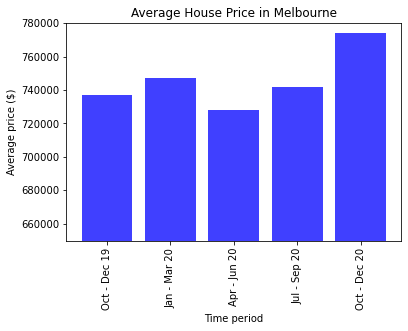

In [71]:
x_axis_data = stats_transposed["index"]
y_axis_data = stats_transposed[0]

x_axis = np.arange(0, len(x_axis_data))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average House Price in Melbourne")
plt.xlabel("Time period")
plt.ylabel("Average price ($)")
plt.ylim(ymax = 780000, ymin = 650000)

plt.bar(x_axis, y_axis_data, facecolor="blue", alpha=0.75, align="center")

plt.xticks(tick_locations, x_axis_data, rotation=90)

plt.show()